<a href="https://colab.research.google.com/github/ruturaj0626/R-Programming-in-Data-Science/blob/main/EDA_of_Spotify_%26_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [6]:
install.packages("sqldf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
df <- read_csv("/content/Spotify_Youtube.csv")# reading the CSV File
df <- na.omit(df) #ominting Na Values from the data frame

New names:
• `` -> `...1`
Rows: 1438 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Artist, Url_spotify, Track, Album, Album_type, Uri, Url_youtube, T...
dbl (16): ...1, Danceability, Energy, Key, Loudness, Speechiness, Acousticne...
lgl  (2): Licensed, official_video

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
df

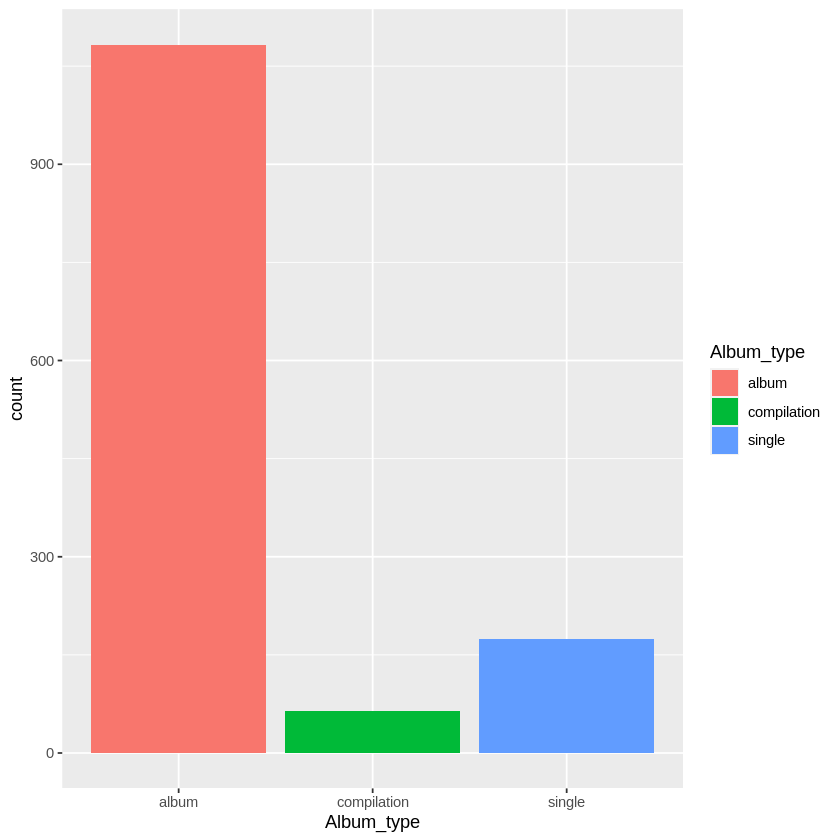

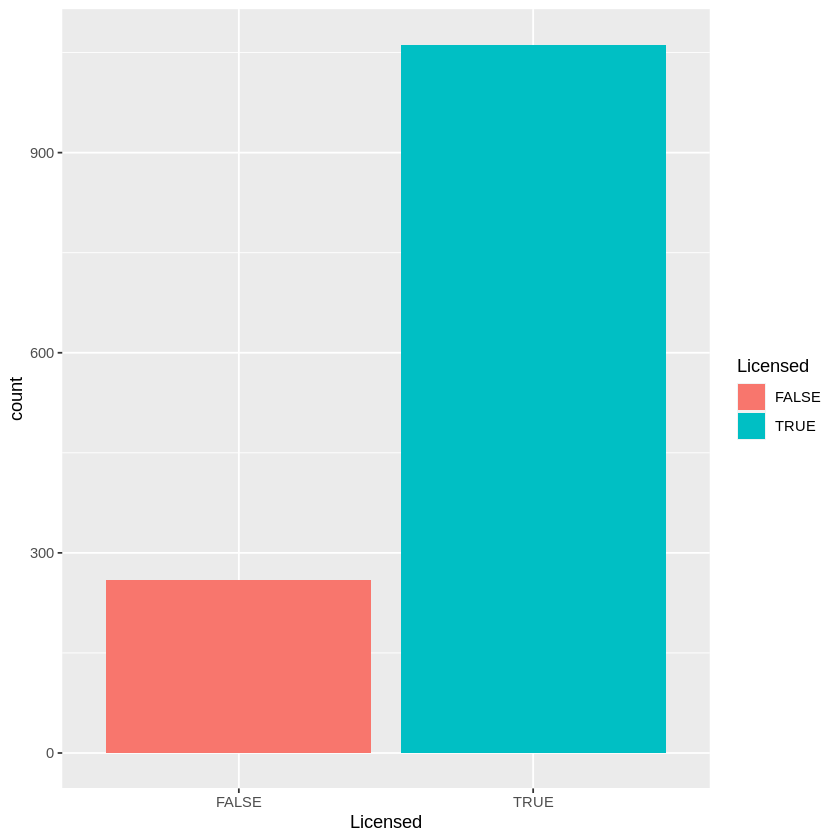

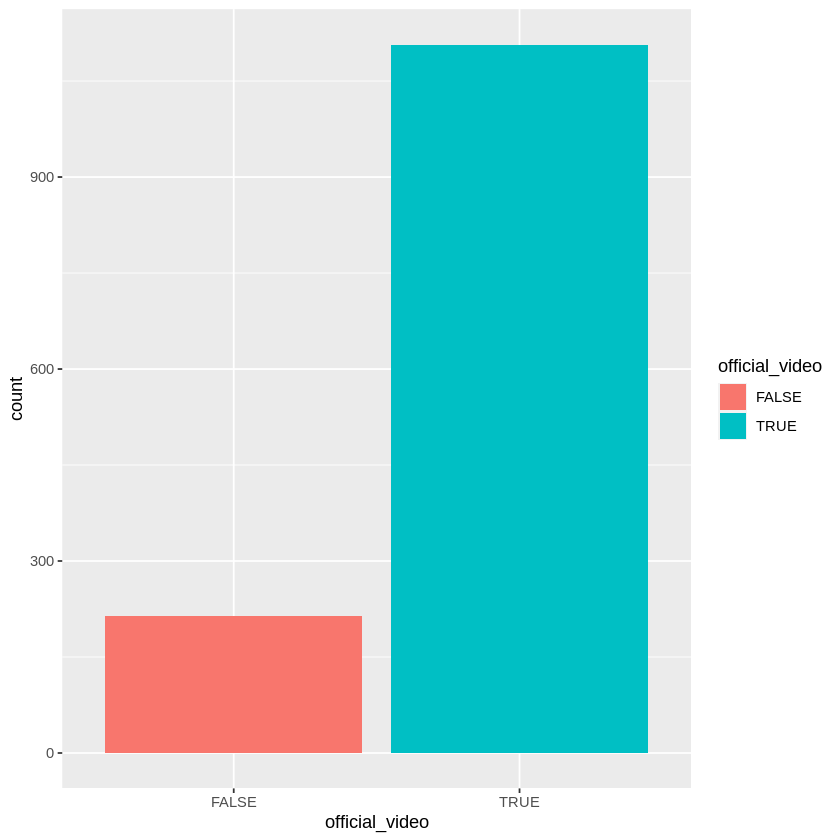

In [11]:
#ploting Count of Album_type
 ggplot(data=df,aes(x= Album_type,fill=Album_type))+geom_bar()
 
  
  #ploting Count of Licensed Videos
   ggplot(data=df,aes(x=Licensed,fill=Licensed))+geom_bar()
   
   #ploting Count of official_video
   ggplot(data=df,aes(x=official_video,fill= official_video))+geom_bar()
 

In [12]:
   #Count of Official Videos with and with out License   
print("No of Officials videos with  No License:")
  sqldf("select count(official_video) as No_of_Officials_videos_with_no_license from df where Licensed = FALSE ")
print("No of Officials videos with License:")
  sqldf("select count(official_video) as No_of_Officials_videos_with_license from df where Licensed = TRUE ")
 

[1] "No of Officials videos with  No License:"


No_of_Officials_videos_with_no_license
<int>
259


[1] "No of Officials videos with License:"


No_of_Officials_videos_with_license
<int>
1062


In [ ]:
#install.packages("gridExtra")
library(gridExtra)

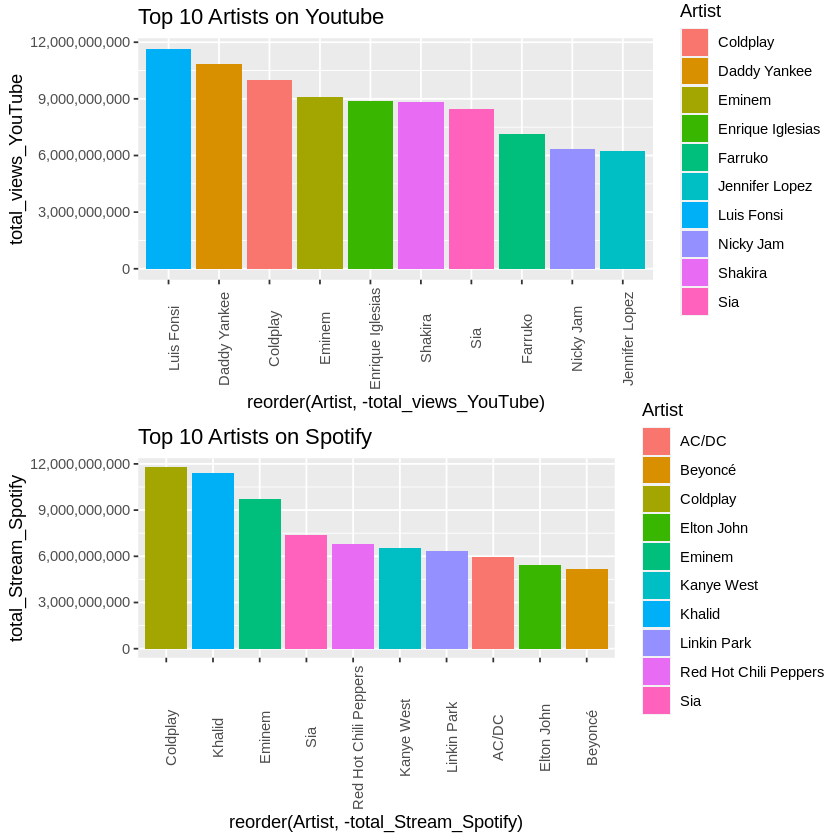

In [16]:
  #Top 10 Artists on Youtube
  plt1 <- sqldf("select Artist, sum(Views)as total_views_YouTube from df group by Artist order by total_views_YouTube desc limit 10")
  plot1 <-ggplot(data = plt1,aes(x= reorder(Artist,- total_views_YouTube), y=total_views_YouTube,fill=Artist))+geom_col()+ scale_y_continuous(labels = scales::comma)+ggtitle("Top 10 Artists on Youtube")+
  theme(axis.text.x = element_text(angle = 90))
  #Top 10 Artists on Spotify
  plt2<-sqldf("select Artist,  Sum(Stream) as total_Stream_Spotify from df group by Artist order by total_Stream_Spotify desc limit 10")
  plot2<- ggplot(data = plt2,aes(x= reorder(Artist,- total_Stream_Spotify), y=total_Stream_Spotify,fill=Artist))+geom_col()+ scale_y_continuous(labels = scales::comma)+ggtitle("Top 10 Artists on Spotify")+
  theme(axis.text.x = element_text(angle = 90))
  
  grid.arrange(plot1, plot2)

[1] "Average Energy of Top 10 Albums With Max Views"
[1] 0.8067


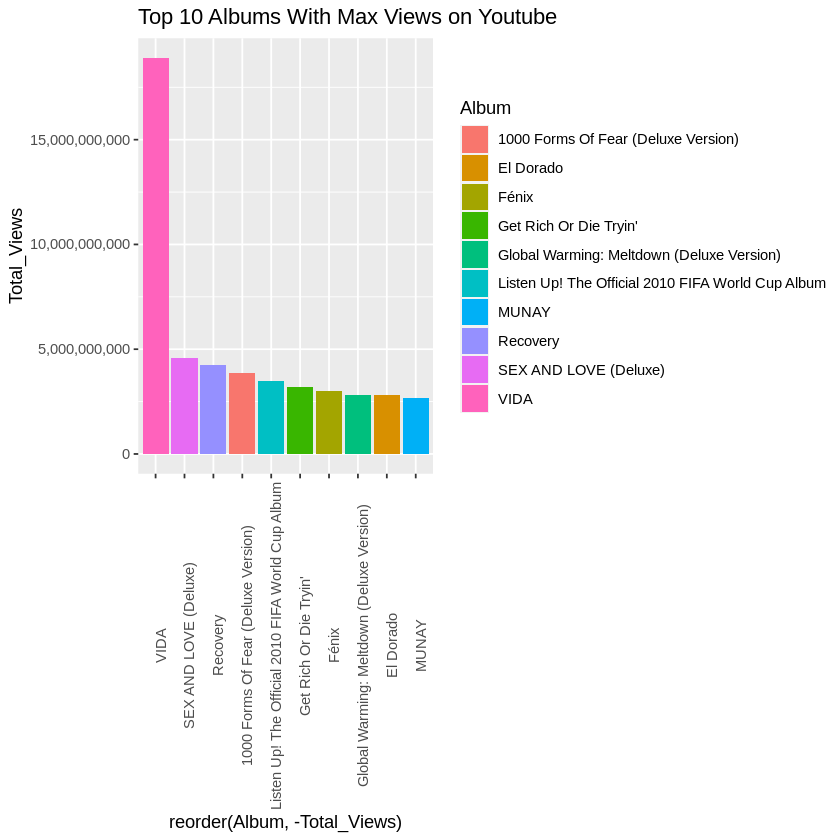

[1] "Average Energy of Top 10 Albums With Max Likes"
[1] 0.7161


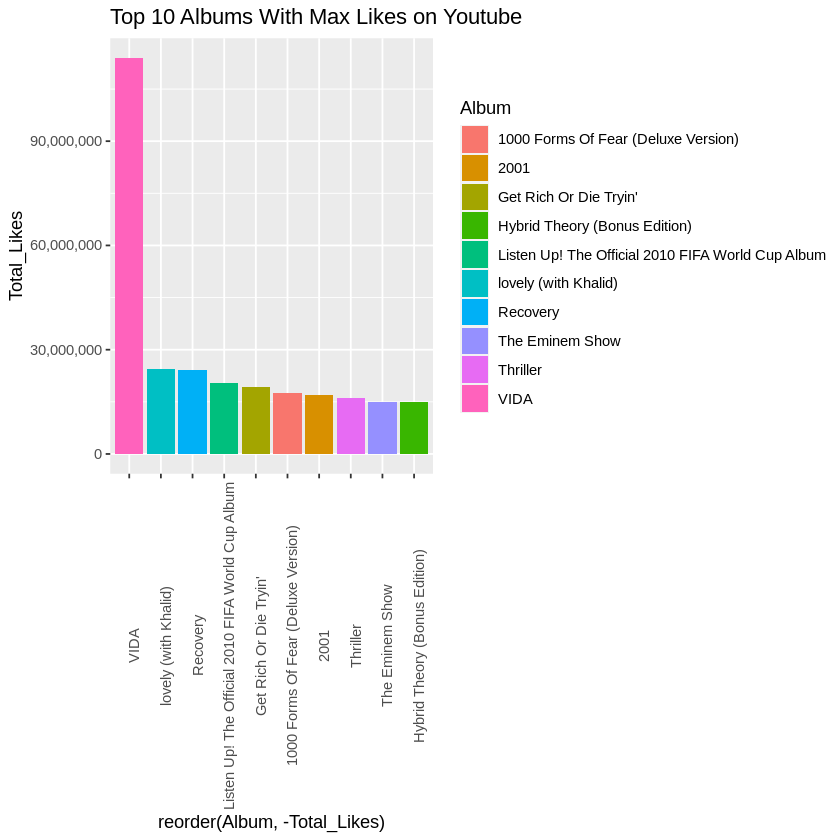

[1] "Average Energy of Top 10 Albums With Max comments"
[1] 0.7212


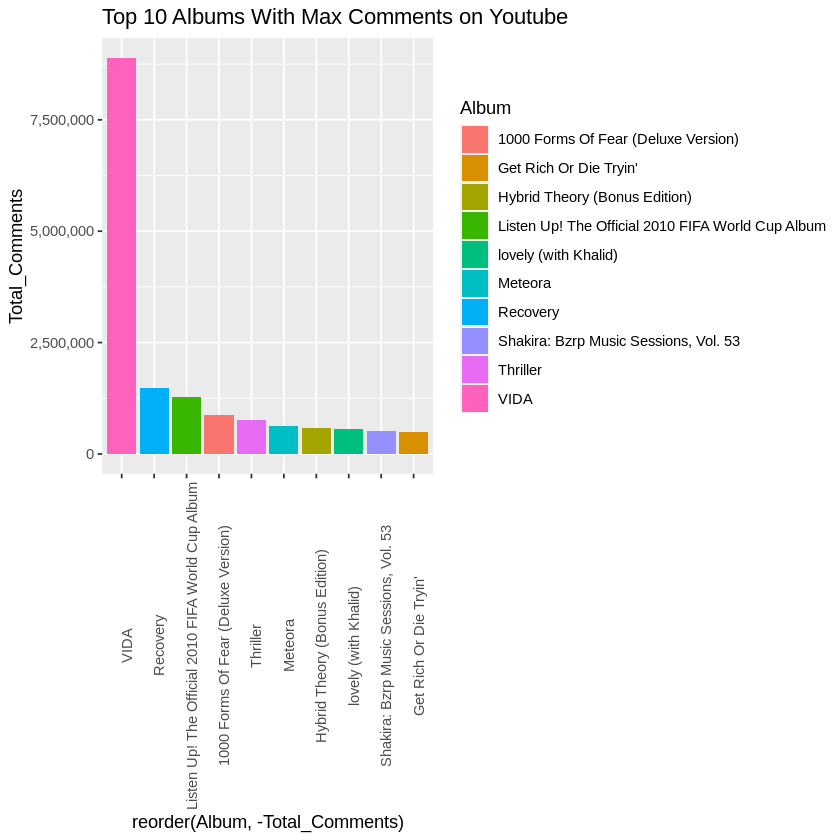

In [17]:
  
  # Top 10 Albums with Maximum Views,Likes and Comments
  x1 <- sqldf("select  Album,sum(Views)as Total_Views,Energy from df group by Album order by Total_Views desc limit 10 ")
ggplot(data = x1,aes(x= reorder(Album,- Total_Views), y=Total_Views,fill=Album))+geom_col()+ scale_y_continuous(labels = scales::comma)+ggtitle("Top 10 Albums With Max Views on Youtube")+theme(axis.text.x = element_text(angle = 90))       
   mean1<- mean(x1$Energy)

print("Average Energy of Top 10 Albums With Max Views")
print( mean1)

x2<- sqldf("select  Album,Sum(Likes)as Total_Likes,Energy  from df group by Album order by Total_Likes desc limit 10 ")
        ggplot(data = x2,aes(x= reorder(Album,- Total_Likes), y=Total_Likes,fill=Album))+geom_col()+ scale_y_continuous(labels = scales::comma)+ggtitle("Top 10 Albums With Max Likes on Youtube")+theme(axis.text.x = element_text(angle = 90))
   mean2<- mean(x2$Energy)

print("Average Energy of Top 10 Albums With Max Likes")
print( mean2)

x3<- sqldf("select  Album,Sum(Comments)as Total_Comments ,Energy from df group by Album order by Total_Comments desc limit 10 ")
   ggplot(data = x3,aes(x= reorder(Album,- Total_Comments), y=Total_Comments,fill=Album))+geom_col()+ scale_y_continuous(labels = scales::comma)+ggtitle("Top 10 Albums With Max Comments on Youtube")+theme(axis.text.x = element_text(angle = 90))
mean3<- mean(x3$Energy)

print("Average Energy of Top 10 Albums With Max comments")
print( mean3)



In [18]:
   sqldf("select Artist, Album,Energy from df group by artist order by Energy  desc limit 10")
   sqldf("select Artist, Album,Danceability  from df group by artist order by Danceability  desc limit 10")
   sqldf("select Artist, Album,Acousticness  from df group by artist order by Acousticness  desc limit 10")
   sqldf("select  Album,Instrumentalness  from df group by artist order by Instrumentalness  desc limit 10")
   
  

Artist,Album,Energy
<chr>,<chr>,<dbl>
Slipknot,Vol. 3: The Subliminal Verses,0.982
Juanes,Balas Perdidas,0.973
Metallica,"Garage, Inc.",0.972
Nelly Furtado,Loose,0.970
Armin van Buuren,Balance,0.963
Pearl Jam,Ten,0.944
Billy Joel,An Innocent Man,0.944
Green Day,Dookie,0.943
Bruce Springsteen,Born In The U.S.A.,0.942


Artist,Album,Danceability
<chr>,<chr>,<dbl>
Nate Dogg,Party We Will Throw Now! - Single,0.934
Michael Jackson,Thriller,0.932
Bob Marley & The Wailers,Uprising,0.916
2Pac,Greatest Hits,0.916
50 Cent,Get Rich Or Die Tryin',0.902
The Notorious B.I.G.,Life After Death (2014 Remastered Edition),0.901
Usher,Confessions (Expanded Edition),0.894
Daddy Yankee,ULALA (OOH LA LA),0.872
Jack Johnson,In Between Dreams,0.868


Artist,Album,Acousticness
<chr>,<chr>,<dbl>
John Williams,Home Alone (Original Motion Picture Soundtrack) [Anniversary Edition],0.994
Frédéric Chopin,Chopin: Nocturnes,0.984
John Mayer,The Search for Everything,0.983
Wolfgang Amadeus Mozart,"Mozart: Piano Concertos, Vol. 6",0.982
Hans Zimmer,Interstellar (Original Motion Picture Soundtrack) [Expanded Edition],0.951
Elvis Presley,Blue Hawaii,0.941
Ludovico Einaudi,In A Time Lapse,0.934
Khalid,lovely (with Khalid),0.934
Nat King Cole,The Christmas Song (Expanded Edition),0.920


Album,Instrumentalness
<chr>,<dbl>
Interstellar (Original Motion Picture Soundtrack) [Expanded Edition],0.982
"Mozart: Piano Concertos, Vol. 6",0.972
In A Time Lapse,0.961
Chopin: Nocturnes,0.936
Bach: Unaccompanied Cello Suites (Remastered),0.867
Shock Value,0.751
The Joshua Tree (Super Deluxe),0.355
Holiday Inn (Original Motion Picture Soundtrack),0.353
Confessions on a Dance Floor,0.161


In [21]:
#install.packages("tidyr")
library(tidyr)

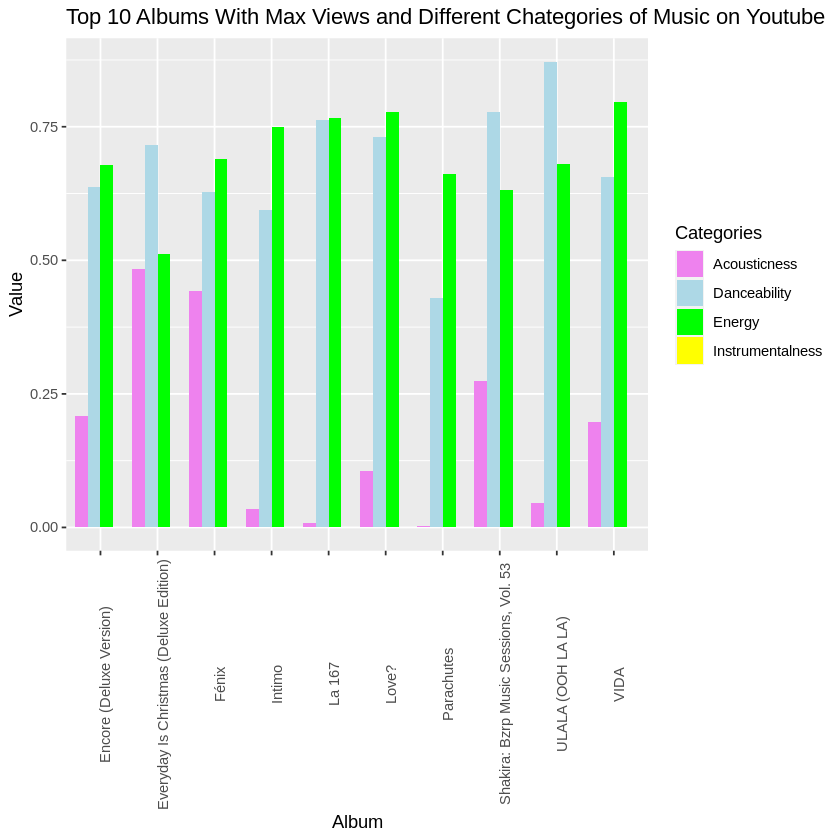

In [22]:
z<- sqldf("select Artist, Album,Energy,Danceability, Acousticness,Instrumentalness, sum(Views)as Total_Views from df group by artist order by Total_Views  desc limit 10")

DF <- z %>% gather(key = Artist, value = Value,Energy,Danceability, Acousticness,Instrumentalness)
   ggplot(DF, aes(Album, Value,fill=Artist)) + geom_col(position = "dodge")+theme(axis.text.x = element_text(angle = 90))  +ggtitle("Top 10 Albums With Max Views and Different Chategories of Music on Youtube")+ scale_fill_manual("Categories",values = c("violet","lightblue","green","yellow") )
   
   

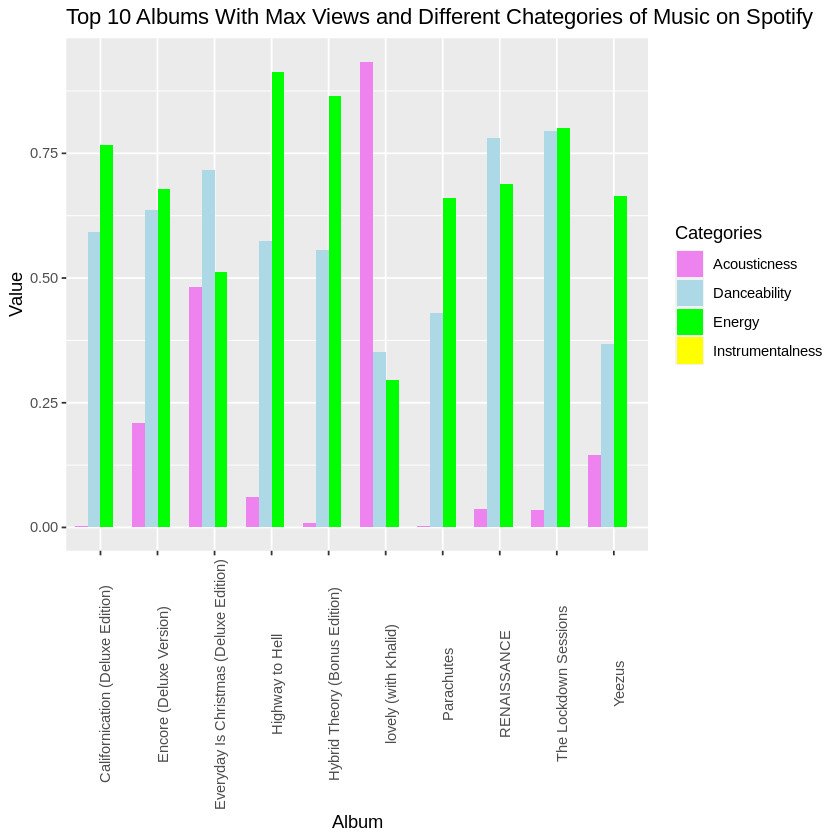

In [23]:
 z1<- sqldf("select Artist, Album,Energy,Danceability, Acousticness,Instrumentalness, sum(Stream)as Total_Views from df group by artist order by Total_Views  desc limit 10")
   
   DF1 <- z1 %>% gather(key = Artist, value = Value,Energy,Danceability, Acousticness,Instrumentalness)
   ggplot(DF1, aes(Album, Value,fill=Artist)) + geom_col(position = "dodge")+theme(axis.text.x = element_text(angle = 90))  +ggtitle("Top 10 Albums With Max Views and Different Chategories of Music on Spotify")+ scale_fill_manual("Categories",values = c("violet","lightblue","green","yellow") )
   
   
   